# Movie Analysis for Microsoft Studios

## Business Problem: 

The purpose of this analysis is to find trends in movie data that will allow Microsoft to decide what kind of movies to make at their new Microsoft studio. Since Microsoft is just getting into the movie business, they need actionable insights to decide what kind of films to create.  

As a business, Microsoft's goal is to make money. With so many attributes to a successful movie, Microsoft needs to know what kind of movie to make and how to make it, in order to earn a net profit.

This data will explore that question from three angles: runtime, time of year the movie is released and production budget, as these factors relate to the net profit the movie made.  

## Why use net profit? 

Movies are generally evaluated as sucessful based on their box office numbers, however, this does not give us the full picture. A huge percent of the money made by movies is from streaming platforms, as well a ancillary revenue from things like overseas movie rights, fast food partnerships, toys, video games, clothing and amusement park rides. 

Further, just looking at gross revenue isn't accurate either, as this doesn't account for the cost to make and advertise the movie. Just because a movie has a gross revenue of 10M, doesn't mean that they made anywhere close to $10M after the production budget, cost of advertising, cuts that go to the theaters, etc. which in some cases could be just as high. 

Sources: 

https://phys.org/news/2017-11-explores-movie-successful.html

https://www.nytimes.com/2012/07/01/magazine/how-does-the-film-industry-actually-make-money.html

## Data Understanding:

The data used for this analysis came from two sources: The Movie Database (TMDB) and The Numbers (TN). 

The TMDB data was used to analyze runtime, with a total of 4,766 data points used after cleaning the data. 
This data was collected from a dataset on kaggle: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

The TN data was used to analyze the movie's premiere month and production budget, with a total of 5,782 data points. This data was collected from a dataset provided by the Flatiron School. 

Both TMDB and TN are reliable data sources that provide movie insight based on a variety of factors. 

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Runtime vs. Net Profit (TMDB)

### Data Preparation:

In [2]:
#import the data
tmdb = pd.read_csv('zippedData/tmdb_5000_movies.csv')

In [3]:
#look at the data
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
#dropping the unnecessary columns (only using this dataset for net profit to runtime)
tmdb_new= tmdb.drop(columns=["release_date", "genres", "tagline", "id", "keywords", "popularity", "homepage", "original_language", "original_title", "overview", "production_companies", "production_countries", "spoken_languages", "status", "vote_average", "vote_count", "title"])
tmdb_new

,budget,revenue,runtime
0,237000000,2787965087,162.0
1,300000000,961000000,169.0
2,245000000,880674609,148.0
3,250000000,1084939099,165.0
4,260000000,284139100,132.0
...,...,...,...
4798,220000,2040920,81.0
4799,9000,0,85.0
4800,0,0,120.0
4801,0,0,98.0


In [5]:
#check for null values
tmdb_new.isna().sum()

budget     0
revenue    0
runtime    2
dtype: int64

In [6]:
#drop rows with null values
tmdb_new.dropna(inplace=True)

Because there are only 2 null values out of 4,803, it is a safe assuption that dropping those two rows will not change our data. 

In [7]:
#sanity check- make sure the null values have been dropped
tmdb_new.isnull().sum()

budget     0
revenue    0
runtime    0
dtype: int64

In [8]:
#look at the data
tmdb_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4801 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   budget   4801 non-null   int64  
 1   revenue  4801 non-null   int64  
 2   runtime  4801 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 150.0 KB


In [9]:
#drop rows that have a value of 0 for runtime, as these values are the same as nulls
tmdb_new.drop(tmdb_new.query('runtime == 0').index, inplace=True)

In [10]:
#sanity check- make sure the rows with values of 0 have have been dropped
tmdb_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4766 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   budget   4766 non-null   int64  
 1   revenue  4766 non-null   int64  
 2   runtime  4766 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 148.9 KB


We now have 4766 entries as opposed to the 4801 above

In [11]:
#calculate net profit
tmdb_new['net_profit'] = tmdb_new['revenue'] - tmdb_new['budget']
tmdb_new['net_profit']

0       2550965087
1        661000000
2        635674609
3        834939099
4         24139100
           ...    
4798       1820920
4799         -9000
4800             0
4801             0
4802             0
Name: net_profit, Length: 4766, dtype: int64

### Data Exploration:

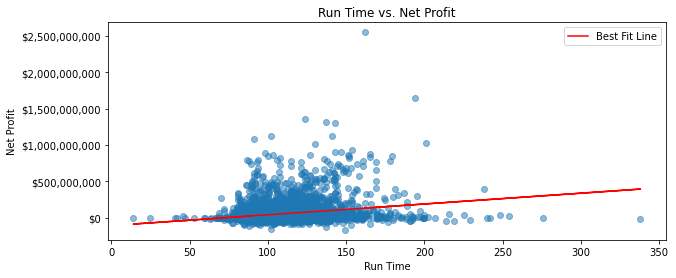

In [12]:
#plot the runtimes vs net profit
fig, ax = plt.subplots (figsize = (10, 4))
ax.scatter(tmdb_new['runtime'], tmdb_new['net_profit'], alpha = 0.5)

#label the graph and axis 
ax.set_title('Run Time vs. Net Profit')
ax.set_xlabel('Run Time')
ax.set_ylabel('Net Profit')

#add $ and commas to the axis labels
ax.yaxis.set_major_formatter('${x:,.0f}') 

#create the best fit line 
x=tmdb_new['runtime']
y=tmdb_new['net_profit']
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b, c="red")
plt.legend(['Best Fit Line'])

#save graphs
plt.savefig('./images/Run Time vs. Net Profit.jpeg', bbox_inches = 'tight')
plt.savefig('./images/Run Time vs. Net Profit.png', bbox_inches = 'tight');

In [13]:
#calculate the Correlation Coefficient 
np.corrcoef(tmdb_new['runtime'], tmdb_new['net_profit'])[0][1]

0.22578586807142154

Code citation: 
The code to create the best fit line and to save the images was adapted from: https://github.com/xiaohua-su/Film-Analysis/blob/main/Analysis_of_Films.ipynb

### Findings/ Recommendation: 

As we can see in the graph above, there is a very weak, positive correlation between the a movie's runtime and the movie's net profit. 
Most movies are between 90-140 minutes, however, the runtime of the movie does not have a strong correlation to the sucess of the movie, so Microsoft can choose to make the movie as long as they want without too much concern.   

## Release Month vs. World Wide Net Profit (TN)

### Data Preparation:

In [14]:
#import the data
tn = pd.read_csv('zippedData/tn.movie_budgets.csv')

In [15]:
#look at the data
tn.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [16]:
#separate the month of the movie's release from the rest of the date
tn['release_month'] = pd.DatetimeIndex(tn['release_date']).month
tn['release_month']

0       12
1        5
2        6
3        5
4       12
        ..
5777    12
5778     4
5779     7
5780     9
5781     8
Name: release_month, Length: 5782, dtype: int64

In [17]:
#check for null values types of data for each column
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   release_month      5782 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 316.3+ KB


Here we see there are no null values, this data has been pre- cleaned for nulls

In [18]:
#check to see if there are any values of 0 for release month. 
#Values of 0 are the same as nulls so the rows will be dropped

tn.drop(tn.query('release_month == 0').index, inplace=True)

In [19]:
#check to see if any rows were dropped 
tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   release_month      5782 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 361.4+ KB


This table has the same number of rows, so there werent any values of 0

Here we also see the "worldwide_gross" and "production budget" column types are "object".  We need to change them to integers to be able to calculate the net revenue and then graph that against the month  

In [20]:
#change worldwide gross from an object to an int

tn['gross_clean'] = tn['worldwide_gross'].str.replace('$','').str.replace(',','')
tn['gross_clean'] = pd.to_numeric(tn['gross_clean'])
tn['gross_clean']

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: gross_clean, Length: 5782, dtype: int64

Code citation: 
The code to change the gross revenue from an object to an integer was adapted from:  https://github.com/xiaohua-su/Film-Analysis/blob/main/Analysis_of_Films.ipynb

In [21]:
#sanity check- confirm that the gross_clean is an integer
tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   release_month      5782 non-null   int64 
 7   gross_clean        5782 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 406.5+ KB


In [22]:
#change production budget from an object to an int

tn['PB_clean'] = tn['production_budget'].str.replace('$','').str.replace(',','')
tn['PB_clean'] = pd.to_numeric(tn['PB_clean'])
tn['PB_clean']

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: PB_clean, Length: 5782, dtype: int64

In [23]:
#sanity check- confirm that the PB_clean is an integer
tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   release_month      5782 non-null   int64 
 7   gross_clean        5782 non-null   int64 
 8   PB_clean           5782 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 451.7+ KB


In [24]:
#calculate the net profit
tn['net_profit'] = tn['gross_clean'] - tn['PB_clean']
tn['net_profit']

0       2351345279
1        635063875
2       -200237650
3       1072413963
4        999721747
           ...    
5777         -7000
5778        234495
5779         -3662
5780         -1400
5781        179941
Name: net_profit, Length: 5782, dtype: int64

### A sidenote as to why I used worldwide gross revenue to calculate the net profit as opposed to the domestic gross revenue:

One of the advantages of 21st century technology is that people can watch content that is made in other countries and companies can profit from this. 

To illustrate the amount of gross revenue made from movies outside of the U.S, I subtracted worldwide gross from the domestic gross.

In [25]:
#change domestic gross from an object to an int
tn['dom_gross_clean'] = tn['domestic_gross'].str.replace('$','').str.replace(',','')
tn['dom_gross_clean'] = pd.to_numeric(tn['dom_gross_clean'])
tn['dom_gross_clean']

0       760507625
1       241063875
2        42762350
3       459005868
4       620181382
          ...    
5777            0
5778        48482
5779         1338
5780            0
5781       181041
Name: dom_gross_clean, Length: 5782, dtype: int64

In [26]:
#calculate foreign gross revenue
foreign_gross_revenue = tn["gross_clean"] - tn["dom_gross_clean"]

foreign_gross_revenue.sort_values(ascending=False).head(20)

0      2015837654
42     1548844451
6      1369318718
66     1165715774
5      1116648995
22     1009081502
33      996584239
260     960500000
3       944008095
26      894656350
112     888053039
155     871731901
36      858600000
672     824290403
135     811832833
47      806400000
51      806166704
1       804600000
63      771400000
629     770103450
dtype: int64

As we can see from this data, a lot of revenue is generated from other countries, so limiting our data to just domestic gross may not give us a full picture. 

### Back to comparing release date to worldwide net profit:

Through my data exploration I saw that the premiere date for the top 100 netting movies varied greatly from the premiere dates for the rest of the movies analyzed. For that reason, I decided to compare the premiere dates of the top 100 movies to the premiere dates of the rest of the movies. 

In [27]:
#pull out the top 100 movies based on net profit
tn_top100 = tn.sort_values(by='net_profit', ascending=False)[:100]
tn_top100

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,gross_clean,PB_clean,net_profit,dom_gross_clean
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",12,2776345279,425000000,2351345279,760507625
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944","$2,208,208,395",12,2208208395,200000000,2008208395,659363944
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",4,2048134200,300000000,1748134200,678815482
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",12,2053311220,306000000,1747311220,936662225
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",6,1648854864,215000000,1433854864,652270625
...,...,...,...,...,...,...,...,...,...,...,...
2159,60,"Feb 25, 2004",The Passion of the Christ,"$25,000,000","$370,782,930","$622,341,924",2,622341924,25000000,597341924,370782930
49,50,"Jun 30, 2004",Spider-Man 2,"$200,000,000","$373,524,485","$795,110,670",6,795110670,200000000,595110670,373524485
126,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673",5,756244673,165000000,591244673,238736787
159,60,"May 15, 2003",The Matrix Reloaded,"$150,000,000","$281,553,689","$738,576,929",5,738576929,150000000,588576929,281553689


In [28]:
#Get the value counts of how many of the top 100 movies came out each month, as a percentage
tn_top100_mc = tn_top100['release_month'].value_counts(normalize = True).sort_index()
tn_top100_mc

2     0.03
3     0.06
4     0.04
5     0.21
6     0.18
7     0.16
8     0.02
9     0.01
10    0.01
11    0.15
12    0.13
Name: release_month, dtype: float64

In [29]:
# append the series to have a value of 0 listed for January as none of the top 100 movies premiered in January
tn_top100_mc = np.array([0,0.03,0.06,0.04,0.21,0.18,0.16,0.02,0.01,0.01,0.15,0.13])
tn_top100_mc

array([0.  , 0.03, 0.06, 0.04, 0.21, 0.18, 0.16, 0.02, 0.01, 0.01, 0.15,
       0.13])

In [30]:
#Sort the rest of the movies based on net profit
other_5682 = tn.sort_values(by='net_profit', ascending=False)[:100]
other_5682

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,gross_clean,PB_clean,net_profit,dom_gross_clean
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",12,2776345279,425000000,2351345279,760507625
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944","$2,208,208,395",12,2208208395,200000000,2008208395,659363944
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",4,2048134200,300000000,1748134200,678815482
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",12,2053311220,306000000,1747311220,936662225
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",6,1648854864,215000000,1433854864,652270625
...,...,...,...,...,...,...,...,...,...,...,...
2159,60,"Feb 25, 2004",The Passion of the Christ,"$25,000,000","$370,782,930","$622,341,924",2,622341924,25000000,597341924,370782930
49,50,"Jun 30, 2004",Spider-Man 2,"$200,000,000","$373,524,485","$795,110,670",6,795110670,200000000,595110670,373524485
126,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673",5,756244673,165000000,591244673,238736787
159,60,"May 15, 2003",The Matrix Reloaded,"$150,000,000","$281,553,689","$738,576,929",5,738576929,150000000,588576929,281553689


In [31]:
#Get the value counts of how many of the rest of the movies came out each month, as a percentage
other_5682_mc = tn['release_month'].value_counts(normalize = True).sort_index()
other_5682_mc

1     0.060014
2     0.067797
3     0.081287
4     0.078520
5     0.070391
6     0.082843
7     0.076098
8     0.085783
9     0.085265
10    0.099101
11    0.084054
12    0.128848
Name: release_month, dtype: float64

### Data Exploration:

In [32]:
#setting the labels for my x-axis 
x_axis = other_5682_mc.index.to_numpy()
x_axis

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

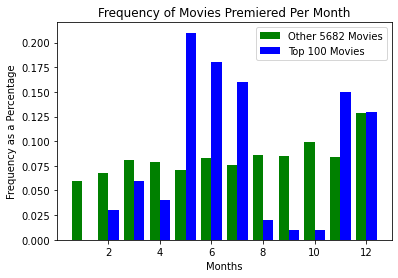

In [33]:
#plot the frequency of movies premiering each month
fig, ax = plt.subplots()
ax.bar(x_axis -0.2, other_5682_mc.values, width = .4, color = "green")
ax.bar(x_axis +0.2, tn_top100_mc, width = .4, color = "blue")

#abel graph and axis
ax.set_xlabel('Months')
ax.set_ylabel('Frequency as a Percentage')
ax.set_title('Frequency of Movies Premiered Per Month')

#create legend
ax.legend(["Other 5682 Movies", "Top 100 Movies"], loc=0)

#save graphs
plt.savefig('./images/Frequency of Movies Premiered Per Month.jpeg', bbox_inches = 'tight')
plt.savefig('./images/Frequency of Movies Premiered Per Month.png', bbox_inches = 'tight');

### Findings/ Recommendation: 

A much higher percentage of the top 100 gross movies premeried in May, June, July, November and December, which makes sense given the summer months and before the holidays are popular months to go out. 

The movies not in the top 100 are much more evenly distributed throughout the year. 

My recommendation would be to premiere your movies over the summer or before the holidays in order to have a larger audience. 

## Production Budget vs. Net Profit (TN)

For this variable, I used the same TN data that was used for the movie premiere date, so the data is already prepared and ready to explore. 

### Data Exploration:

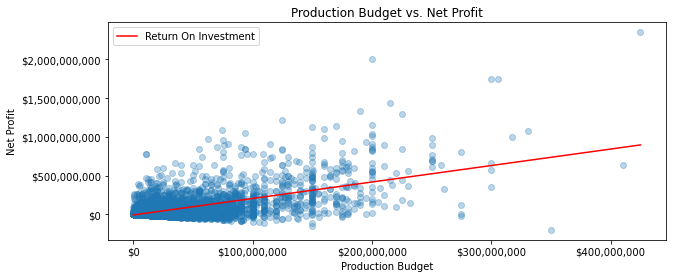

In [34]:
#graph production budget vs net profit
fig, ax = plt.subplots (figsize = (10, 4))
ax.scatter(tn['PB_clean'], tn['net_profit'], alpha = 0.3)

#label the graph and axis
ax.set_title('Production Budget vs. Net Profit')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Net Profit')

#format axis
plt.ticklabel_format(style='plain', axis = 'x')
plt.ticklabel_format(style='plain', axis = 'y')

#add $ and commas to the axis labels
ax.xaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_major_formatter('${x:,.0f}')

#create the best fit line 
x=tn['PB_clean']
y=tn['net_profit']
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b, c="red")
plt.legend(['Return On Investment'])

#save graphs
plt.savefig('./images/Production Budget vs. Net Profit.jpeg', bbox_inches = 'tight')
plt.savefig('./images/Production Budget vs. Net Profit.png', bbox_inches = 'tight');

In [35]:
#calculate the Correlation Coefficient 
np.corrcoef(tn['PB_clean'], y = tn['net_profit'])[0][1]

0.6087521471718846

### Findings/ Recommendation: 

There is a moderately positive correlation between the production budget and the movie's net profit, however this is not an absolute. 
Once the production budget gets above 50m, the chances of making a higher net profit increases, as we can see from the best fit line. 

### Conclusion: 

Runtime: Most movies are between 90-140 minutes, however, because the runtime of the movie does not have a strong correlation to the sucess of the movie, Microsoft can choose to make the movie as long as they want without too much concern.   

Premiere date: A much higher percentage of the top 100 gross movies premeried in May, June, July, November and December, compared to the rest of the movies which premiered in a more even distribution throughout the year. Therefore, Microsoft should premiere their movies over the summer or before the holidays. 

Production budget: There is a positive correlation between the production budget and the movie's net profit, however this is not an absolute. Once the production budget gets above 50m, the chances of making a higher net profit increases, as we can see from the best fit line. 

### Next Steps: 

To further analysis how the production budget relates to net profit, it would be helpful to break the production budgets into bins (0-10M, 10-25M, 25-50M, etc) and calculate the mean of each budget as it relates to the mean net profit. 

Another helpful factor to analyze would be which genres of movies that have the highest net profit. 

Lastly, as discussed above, ancillary revenue has a big impact on net profit so analyzing the ancillary revenue of movies would be another helpful data point for Microsoft. 